In [31]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2

%load_ext rpy2.ipython
#% starts an IPython-specific directive

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [32]:
%%R
#Whole code cell is to be interpreted as an R code (%%)
seq.data <- read.delim('../sequence.index', header = TRUE, stringsAsFactors = FALSE)
seq.data$READ_COUNT <- as.integer(seq.data$READ_COUNT)
seq.data$BASE_COUNT <- as.integer(seq.data$BASE_COUNT)

In [33]:
seq_data = %R seq.data

print(type(seq_data))

<class 'pandas.core.frame.DataFrame'>


In [34]:
#Since the data is stored as a pandas Dataframe format, it can operate using the pandas interface
my_col = list(seq_data.columns).index("CENTER_NAME")
seq_data['CENTER_NAME'] = seq_data['CENTER_NAME'].apply(lambda x : x.upper())

#Putting this Dataframe back to R
%R -i seq_data
#The '-i' arg informs the system that the variable 'seq_data' is to be copied in the R namespace
%R print(colnames(seq_data))

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


'FASTQ_FI...,'MD5','RUN_ID',...,'READ_COU...,'BASE_COU...,'ANALYSIS...


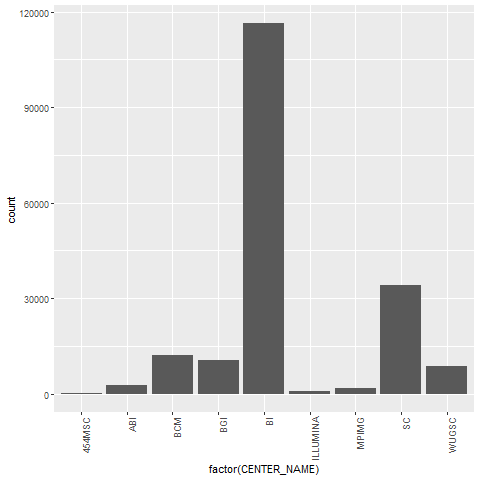

In [35]:
%%R
bar <- ggplot(seq_data) + aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)

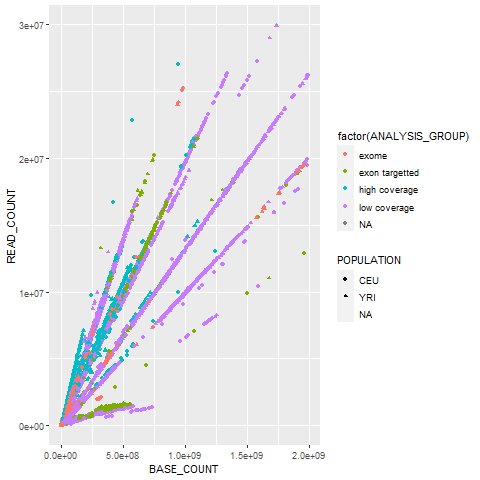

In [36]:
%%R
seq_data$POPULATION <- as.factor(seq_data$POPULATION)
yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT < 2E9 & seq_data$READ_COUNT < 3E7, ]

scatter <- ggplot(yri_ceu, aes(x=BASE_COUNT, y=READ_COUNT, col=factor(ANALYSIS_GROUP), shape=POPULATION)) + geom_point()
print(scatter)

png 
  2 


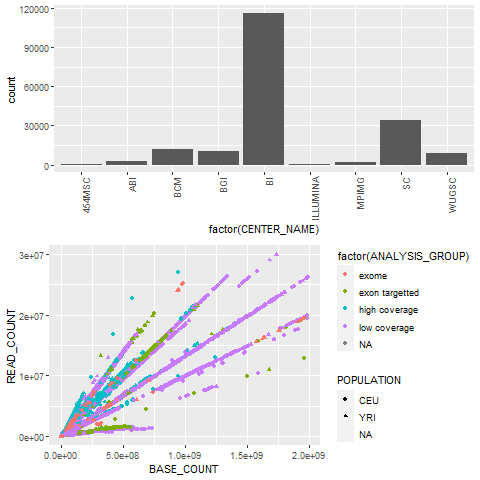

In [37]:
%%R

library(gridExtra)
library(grid)
figure <- grid.arrange(bar, scatter, ncol=1)
figure

#Search later on how to save the figures as a .png file
png('mergedFigure.png')
figure
dev.off()